<a href="https://colab.research.google.com/github/Bernardo-Senna/DataScience_Cryptocurrency_Project/blob/main/notebooks/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICD - Projeto Final: Cryptocurrency
## Introdução
Neste trabalho vamos analisar informações históricas de preços de algumas das principais criptomoedas do mercado, por capitalização.

### Motivação
A motivação pelo trabalho veio de um interesse em comum entre os membros do grupo, à respeito da ascenção apresentada pelas Cripto Moedas. 
Para entender melhor as influências criadas por elas no mercado financeiro, e também os diversos impactos causados por elas, escolhemos uma base de dados que apresenta os dados históricos de 23 das principais cripto moedas existentes.

### Dados Utilizados
Para a realização deste projeto, foi necessário utilizar alguns conjuntos de dados de domínio público (Kaggle). Nesta seção iremos entrar em mais detalhes sobre as bases utilizadas.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import random
import pandas as pd
import scipy as sci
import scipy.stats as st
import seaborn as sb
import statsmodels.api as sm
import os
import pandas
import sklearn
from statsmodels import tsa
import scipy.stats
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
notebooks_dir = os.getcwd()

### Tratamento dos dados

Nesta seção nós faremos o parse dos dados do banco para um conjunto de dataframes Pandas.

In [3]:
#o comando abaixo faz com que o Pandas identifique dados que tendem ao infinito (inf ou -inf), tratando-os como NaN
pandas.options.mode.use_inf_as_na = True

Os dados são mantidos na forma de 23 planilhas csv que são carregadas como DataFrames.

In [4]:
coinsDict = {
    'aave':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Aave.csv"),
    'binanceCoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_BinanceCoin.csv"),
    'bitcoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Bitcoin.csv"),
    'cardano':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Cardano.csv"),
    'chainLink':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_ChainLink.csv"),
    'cosmos':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Cosmos.csv"),
    'cryptocomCoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_CryptocomCoin.csv"),
    'dogecoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Dogecoin.csv"),
    'eos':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_EOS.csv"),
    'ethereum':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Ethereum.csv"),
    'lota':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Iota.csv"),
    'litecoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Litecoin.csv"),
    'monero':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Monero.csv"),
    'nem':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_NEM.csv"),
    'polkadot':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Polkadot.csv"),
    'solana':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Solana.csv"),
    'stellar':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Stellar.csv"),
    'tether':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Tether.csv"),
    'tron':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Tron.csv"),
    'usdCoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_USDCoin.csv"),
    'uniswap':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Uniswap.csv"),
    'wrappedBitcoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_WrappedBitcoin.csv"),
    'xrp':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_XRP.csv"),
}

In [5]:
#parse da forma como vem dos datasets
coinsDict['aave']

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...,...
141,142,Aave,AAVE,2021-02-23 23:59:59,401.648853,288.714523,400.784976,359.497520,1.179704e+09,4.461395e+09
142,143,Aave,AAVE,2021-02-24 23:59:59,402.910314,344.938860,360.210985,367.230900,7.635339e+08,4.557747e+09
143,144,Aave,AAVE,2021-02-25 23:59:59,384.707877,337.501464,367.219217,337.501464,4.506436e+08,4.189245e+09
144,145,Aave,AAVE,2021-02-26 23:59:59,350.865442,305.153562,338.277176,323.108175,5.491783e+08,4.011296e+09


É feita uma separação das colunas de data em ano, mês e dia, e é computada a mudança bruta e percentual no valor da moeda para cada dia

In [6]:
for coin in coinsDict:
    #separação das datas em dia, mês e ano
    coinsDict[coin]['Year'] = coinsDict[coin]['Date'].map(lambda x: x[0:4])
    coinsDict[coin]['Month'] = coinsDict[coin]['Date'].map(lambda x: x[5:7])
    coinsDict[coin]['Day'] = coinsDict[coin]['Date'].map(lambda x: x[8:10])
    # inclusão da variável difference, que significa a diferença entre o valor de abertura e fechamento da moeda no dia
    coinsDict[coin]['Difference'] = coinsDict[coin]['Close'] - coinsDict[coin]['Open']
    # inclusão de difference percentage, que demonstra os valores de difference, mas percentualmente, para melhor análise
    coinsDict[coin]['DifferencePerc'] = coinsDict[coin]['Difference'] / coinsDict[coin]['Open']
    # limpeza de Date, excluíndo o horário, porque todos são 23:59, ou seja, irrelevante
    coinsDict[coin]['Date'] = coinsDict[coin]['Date'].map(lambda x: x[0:10])

In [7]:
coinsDict['aave'][["Date","Day", "Open", "Close", "Difference", "DifferencePerc"]]

,Date,Day,Open,Close,Difference,DifferencePerc
0,2020-10-05,05,52.675035,53.219243,0.544208,0.010331
1,2020-10-06,06,53.291969,42.401599,-10.890371,-0.204353
2,2020-10-07,07,42.399947,40.083976,-2.315971,-0.054622
3,2020-10-08,08,39.885262,43.764463,3.879201,0.097259
4,2020-10-09,09,43.764463,46.817744,3.053281,0.069766
...,...,...,...,...,...,...
141,2021-02-23,23,400.784976,359.497520,-41.287456,-0.103016
142,2021-02-24,24,360.210985,367.230900,7.019914,0.019488
143,2021-02-25,25,367.219217,337.501464,-29.717754,-0.080926
144,2021-02-26,26,338.277176,323.108175,-15.169000,-0.044842


### Análise preliminar: comportamento individual das moedas no tempo

Nestes plots evidenciamos o comportamento de cada moeda ao longo do tempo, individualmente.

#### Disclaimer!
Os plots foram transferidos para pastas externas para:
1. Possibilitar salvá-los e utilizá-los posteriormente
2. Facilitar a visualização, visto que são muitos plots, que poluem o notebook quando colocados todos juntos em sequência

In [8]:
#Cada ítem desta lista significa: (nome da pasta onde os gráficos estão plotados, nome da variável no DataFrame)
plotting_pairs = [("CloseValue", "Close"), ("OpenCloseDiff", "Difference"), ("OpenCloseDiffPerc", "DifferencePerc"),
                  ("HighestValue", "High"), ("LowestValue", "Low"), ("MarketCap", "Marketcap"), 
                  ("TransactionsVolume", "Volume")]

##### Plots das progressões no tempo

Como são 23 séries temporais de tamanhos variados, se torna dificil analisar visualmente todos eles, por isso selecionamos alguns específicos para visualizar.

In [9]:
os.chdir(notebooks_dir)
os.chdir("../plots/IndividualValueProgressionOverTime/")

In [10]:
def plot_progression(coinsDict, param):
    for name, coin in coinsDict.items():
      fig = plt.figure()
      coin.plot("Date",param, ax=fig.add_subplot())
      plt.title(name)
      plt.xticks(rotation=90)
      plt.ylabel("value in USD")
      plt.savefig("{}.png".format(name), transparent=True, bbox_inches='tight')
      plt.close()
      #plt.show()

In [11]:
for pair in plotting_pairs:
    if pair[0] == "CloseValue": os.chdir("{}".format(pair[0]))
    else: os.chdir("../{}".format(pair[0]))
    print("Você pode encontrar os plots referentes a progressão do valor de {} no tempo na pasta:".format(pair[1]), os.getcwd())
    plot_progression(coinsDict, pair[1])

Você pode encontrar os plots referentes a progressão do valor de Close no tempo na pasta: /home/castro/Code/currency_analysis/DataScience_Cryptocurrency_Project/plots/IndividualValueProgressionOverTime/CloseValue
Você pode encontrar os plots referentes a progressão do valor de Difference no tempo na pasta: /home/castro/Code/currency_analysis/DataScience_Cryptocurrency_Project/plots/IndividualValueProgressionOverTime/OpenCloseDiff
Você pode encontrar os plots referentes a progressão do valor de DifferencePerc no tempo na pasta: /home/castro/Code/currency_analysis/DataScience_Cryptocurrency_Project/plots/IndividualValueProgressionOverTime/OpenCloseDiffPerc
Você pode encontrar os plots referentes a progressão do valor de High no tempo na pasta: /home/castro/Code/currency_analysis/DataScience_Cryptocurrency_Project/plots/IndividualValueProgressionOverTime/HighestValue
Você pode encontrar os plots referentes a progressão do valor de Low no tempo na pasta: /home/castro/Code/currency_analysis


|                                             |                                             |
:--------------------------------------------:|:--------------------------------------------:
<img src="selected_plots/closes/bitcoin.png"> |  <img src="selected_plots/closes/tether.png">
<img src="selected_plots/closes/lota.png"> |  <img src="selected_plots/closes/polkadot.png">





Podemos vizualiazar que existem dois tipos de criptomoedas, as estáveis, como tether e USDcoin, e as flutuantes, como bitcoin e iota. Também pode-se observar um pico em comum nas moedas flutantes de quantidade variável começando no inicio de 2021.


|                                             |                                             |
:--------------------------------------------:|:--------------------------------------------:
<img src="selected_plots/diffs/bitcoin.png"> |  <img src="selected_plots/diffs/tether.png">
<img src="selected_plots/diffs/lota.png"> |  <img src="selected_plots/diffs/polkadot.png">





Em uma primeira diferenciação, podemos observard picos extremos em ambas as direções nos momentos de pico das moedas, que pode ser interpretado como a moeda tendo crescimento extremo de valor acima do valor ideal, e em seguida uma correção dada por uma queda extrema de valor.


|                                             |                                             |
:--------------------------------------------:|:--------------------------------------------:
<img src="selected_plots/volume/bitcoin.png"> |  <img src="selected_plots/volume/tether.png">
<img src="selected_plots/volume/lota.png"> |  <img src="selected_plots/volume/polkadot.png">





O mesmo pico de valor pode ser visto no volume das transações no começo de 2021, exceto que moedas como tether e USDCoin também apresentam crescimento em volume.

#### Stats básicos das moedas no tempo
Analisamos algumas estatísticas básicas para cada moeda em conjunto.

In [12]:
keys = ["CloseValue", "OpenCloseDiff", "OpenCloseDiffPerc", "HighestValue", "LowestValue", "MarketCap", "TransactionsVolume"]
statsDict = dict.fromkeys(keys)

In [13]:
for pair in plotting_pairs:
    if statsDict[pair[0]] is None: statsDict[pair[0]] = pd.DataFrame()
    for name, coin in coinsDict.items():
        statsDict[pair[0]][name] = coin[pair[1]].describe()   

In [14]:
for key, df in statsDict.items():
    statsDict[key] = statsDict[key].transpose()

In [15]:
statsDict["HighestValue"]

,count,mean,std,min,25%,50%,75%,max
aave,146.0,164.001100,156.486088,28.433069,60.988168,87.666625,204.523318,559.122944
binanceCoin,1313.0,19.817551,27.153366,0.101211,10.050000,15.845876,23.245484,342.879593
bitcoin,2862.0,4974.040239,7188.836678,74.561096,426.047752,1197.334961,8138.046589,58330.572142
cardano,1245.0,0.146055,0.190901,0.021050,0.045570,0.083514,0.149314,1.476653
chainLink,1256.0,4.016318,6.256334,0.157440,0.432987,1.429845,3.963060,36.828460
cosmos,716.0,4.940636,3.281356,1.813534,3.174778,4.370125,5.435860,26.419385
cryptocomCoin,806.0,0.071834,0.044087,0.012463,0.039614,0.062946,0.085170,0.270960
dogecoin,2631.0,0.002566,0.006796,0.000089,0.000229,0.001645,0.002810,0.084945
eos,1337.0,4.714829,3.407972,0.518657,2.661220,3.497878,5.661690,22.890400
ethereum,2031.0,267.068034,322.096221,0.482988,13.221850,189.088865,342.238919,2036.286493


Podemos avaliar que, para a maioria das moedas, o desvio padrão é levemente acima da média e para as moedas bitcoin e wrappedBitcoin, temos uma média muito acima da mediana, asim como ethereum e aave, entre outras, o que indica que essas moedas possuem distribuições de valores de calda longa.

In [16]:
statsDict["OpenCloseDiff"]

,count,mean,std,min,25%,50%,75%,max
aave,146.0,2.001584,16.235496,-41.287456,-3.746516,7.870839e-01,5.725155,100.145209
binanceCoin,1313.0,0.166123,5.122881,-76.964711,-0.298600,1.062000e-02,0.400446,136.628176
bitcoin,2862.0,15.785713,409.048280,-5380.502887,-14.212036,1.089504e+00,29.361585,7309.636429
cardano,1245.0,0.000999,0.022887,-0.171591,-0.002449,7.046455e-05,0.002367,0.299979
chainLink,1256.0,0.020327,0.512036,-5.722529,-0.036308,-3.944527e-04,0.043282,3.523765
cosmos,716.0,0.017803,0.436679,-2.581279,-0.124433,3.772814e-04,0.134389,3.476528
cryptocomCoin,806.0,0.000162,0.005418,-0.057982,-0.001293,6.566847e-06,0.001375,0.079642
dogecoin,2631.0,0.000016,0.001011,-0.018627,-0.000019,-9.170035e-07,0.000016,0.026603
eos,1337.0,0.000817,0.469595,-4.059000,-0.085258,-2.559027e-03,0.084626,4.264700
ethereum,2031.0,0.651718,24.275141,-261.113498,-2.333599,-2.970994e-03,3.168496,200.995808


Também podemos ver que nenhuma moeda possui média de variações abaixo de zero, ou seja, todas tem uma tendência, mesmo que pequena, ao crescimento. Porém, algumas moedas como dogecoin possuem menos dias de ganho, o que pode não ser ideal para investimentos, por exemplo.

<AxesSubplot:title={'center':'Maximum'}>

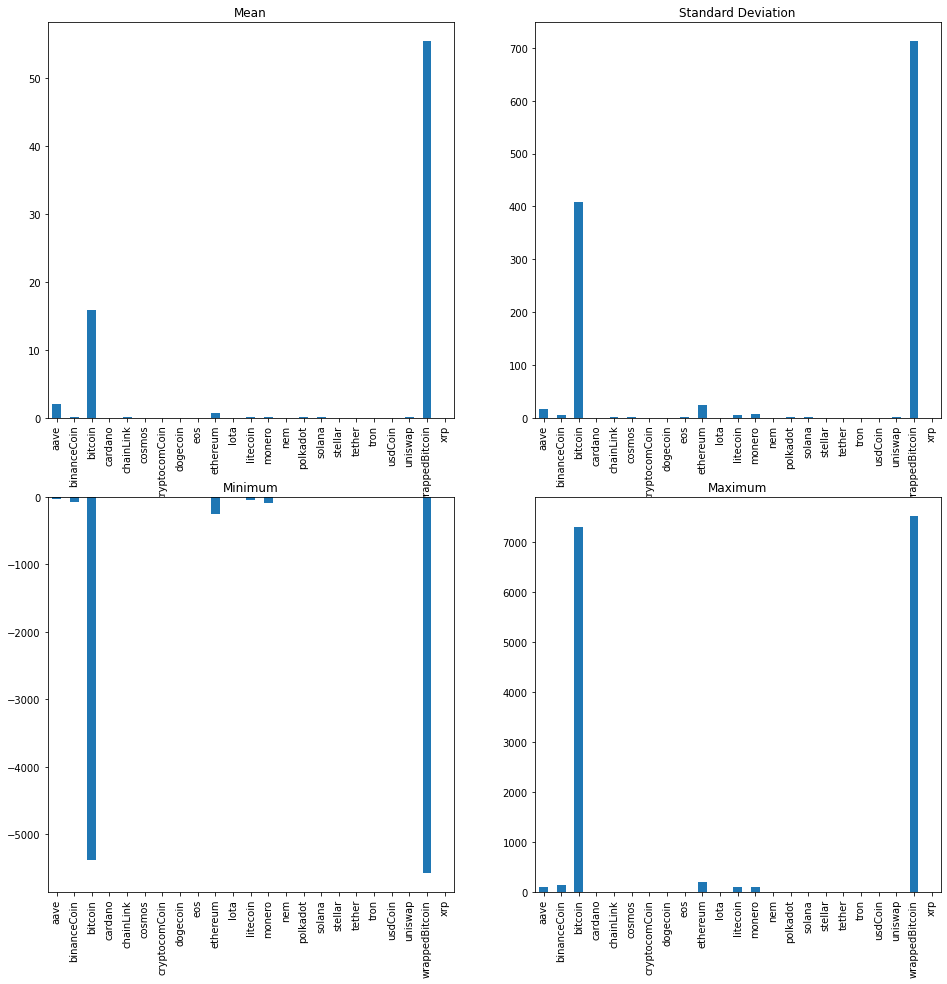

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,16))

ax[0,0].title.set_text("Mean")
statsDict["OpenCloseDiff"]["mean"].plot.bar(ax=ax[0,0])
ax[0,1].title.set_text("Standard Deviation")
statsDict["OpenCloseDiff"]["std"].plot.bar(ax=ax[0,1])
ax[1,0].title.set_text("Minimum")
statsDict["OpenCloseDiff"]["min"].plot.bar(ax=ax[1,0])
ax[1,1].title.set_text("Maximum")
statsDict["OpenCloseDiff"]["max"].plot.bar(ax=ax[1,1])


Podemos ver no gráfico, que bitcoin e wrappedbitcoin completamente dominam as outras moedas tanto em valores extremos quanto em momentos. Temos porém moedas como ethereum e aave, mesmo com sua curta existência, demonstrando momentos acima da média pro resto das moedas

Agora vamos explorar algumas propriedades das ditribuições das moedas.

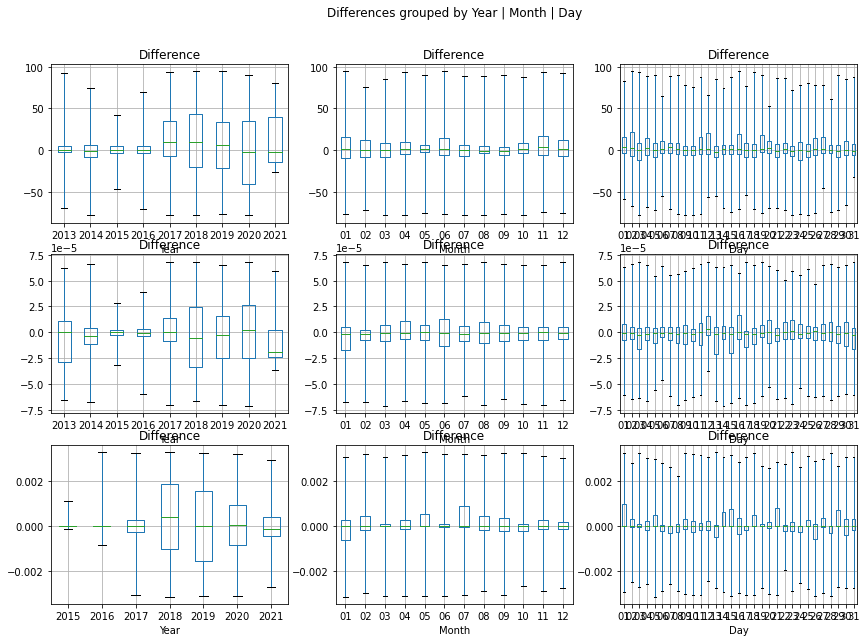

In [18]:

def plot_seasonal_differences(coin, period, value, ax):
    coin = coinsDict[coin].copy()
    Q1 = coin[value].quantile(0.25)
    Q3 = coin[value].quantile(0.75)
    IQR = Q3 - Q1
    f = (coin[value] >= Q1 - 1.5 * IQR) & (coin[value] <= Q3 + 1.5 *IQR)
    coin = coin[f]
    coin.boxplot(by=period, column=value, ax=ax, whis=(0,100))
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
plot_seasonal_differences("bitcoin", "Year", "Difference", axes[0,0])
plot_seasonal_differences("dogecoin", "Year", "Difference", axes[1,0])
plot_seasonal_differences("tether", "Year", "Difference", axes[2,0])


plot_seasonal_differences("bitcoin", "Month", "Difference", axes[0,1])
plot_seasonal_differences("dogecoin", "Month", "Difference", axes[1,1])
plot_seasonal_differences("tether", "Month", "Difference", axes[2,1])


plot_seasonal_differences("bitcoin", "Day", "Difference", axes[0,2])
plot_seasonal_differences("dogecoin", "Day", "Difference", axes[1,2])
plot_seasonal_differences("tether", "Day", "Difference", axes[2,2])
fig.suptitle("Differences grouped by Year | Month | Day")
plt.show()

Podemos ver que existe uma tendência de crescimento no valor absoluto nas variações depois de 2018. Também é possivel notar uma leve tendência a variações de valores maiores no fim e no meio do ano.

A seguir, vemos as distribuições empíricas de algumas moedas

/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

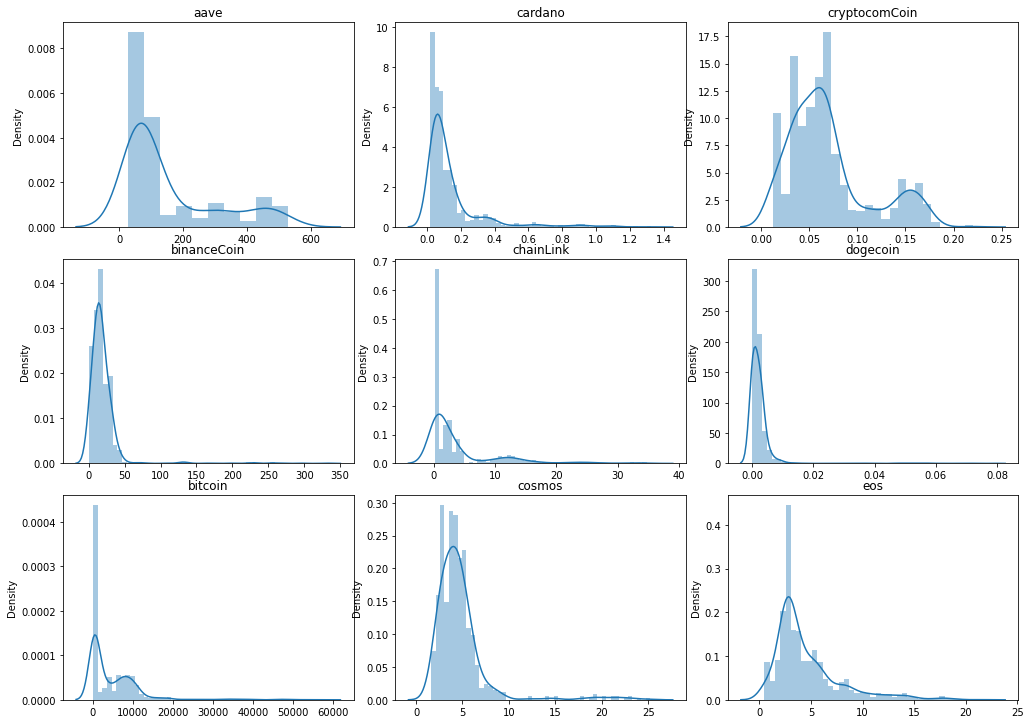

In [19]:
coins = list(coinsDict.keys())[:9]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
fig.tight_layout()
for i, coin in enumerate(coins):
    sb.distplot(coinsDict[coin]["Close"], ax=axes[i%3,i//3])
    axes[i%3, i//3].set_xlabel("")
    axes[i%3, i//3].title.set_text(coin)

Vemos que as moedas não apresentam comportamento de uma normal, tendo caudas longas e em alguns casos multiplos picos. Esse comportamento é típico de uma série temporal não-estacionária, onde para chegar em algum valor extremo é nescessário "passar" pelos valores intermediários, e uma vez que seja atingido esse valor extremo, se ele for mantido, é criado outro pico na distribuição.

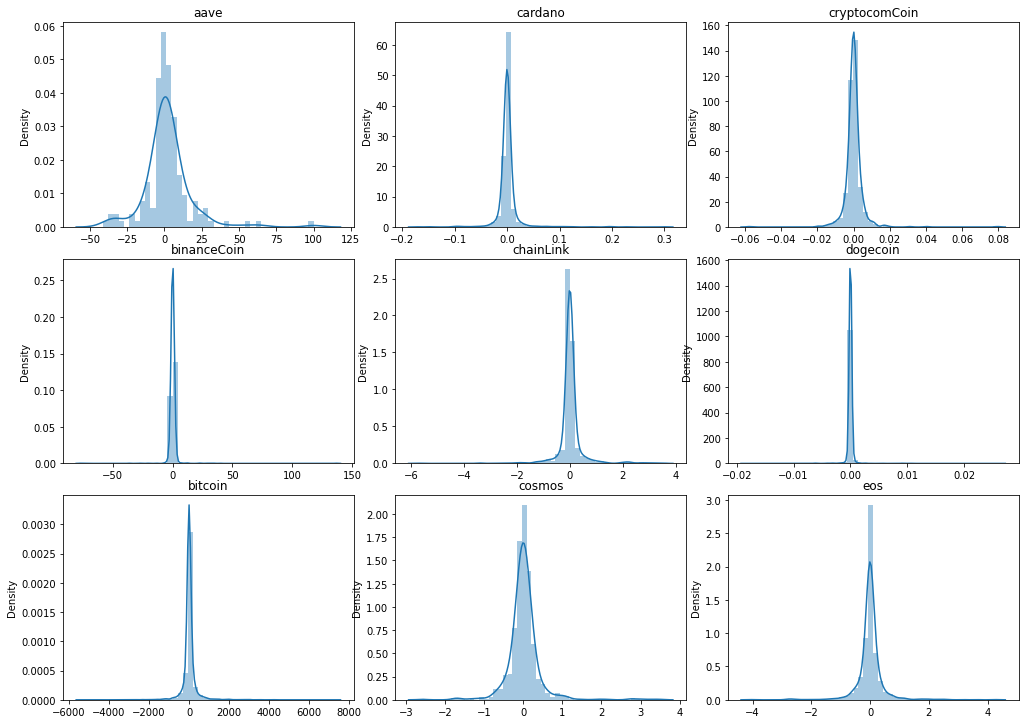

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


coins = list(coinsDict.keys())[:9]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
fig.tight_layout()
for i, coin in enumerate(coins):
    sb.distplot(coinsDict[coin]["Difference"], ax=axes[i%3,i//3])
    axes[i%3, i//3].set_xlabel("")
    axes[i%3, i//3].title.set_text(coin)

Já asdistribuições das diferenças são aparentemente simétricas e de cauda curta e picos "afiados" na média, que é proximo ao zero na maioria dos casos(exceto a bitcoin). Não é incluso nesse trabalho uma comparação com uma normal, mas em experimentos separados notamos que as probabilidades das normal se aproximam a zero mais devagar que as das variações das moedas.

In [21]:
os.chdir(notebooks_dir)
os.chdir("../spreadsheets/")

In [22]:
def write_excel(filename, sheetname, dataframe):
    with pd.ExcelWriter(filename, engine='openpyxl', mode='a', if_sheet_exists="new") as writer: 
        workBook = writer.book
        try:
            workBook.remove(workBook[sheetname])
        finally:
            dataframe.to_excel(writer, sheet_name=sheetname,index=False)
            writer.save()

In [23]:
for name, df in statsDict.items():
    write_excel('simple_stats.xlsx', name ,df)

## Datas de Variação entre moedas

Vamos agora analizar se os dias de alta variação para uma moeda $X_1$ dizem alguma coisa para as outras moedas $X_2$.

Utilizaremos um bootstrap da média da moeda $X_2$ para calcular o intervalo de confiânça dessa média, e compararemos então essa média estimada com a média das diferenças de $X_2$ para os dias de maior variação na moeda $X_1$.

Ou seja, queremos discernir se, nos _dias de maior variação de $X_1$_, $X_2$ é aleatória, ou se existe algum tipo de influência em $X_2$ nesses dias.

Formalmente:

$H_0$: $X_2$ é aleatória e possui média $\mu$ para qualquer seleção de dias

$H_1$: $X_2$ não é aleatória e não possui média $\mu$ para alguma seleção de dias(no caso, a de maior variação de $X_1$.

Calculamos então a média $\mu$ e seu intervalo de confiança com um Bootstrap, para cada par de moedas.

In [24]:
os.chdir(notebooks_dir)

<AxesSubplot:>

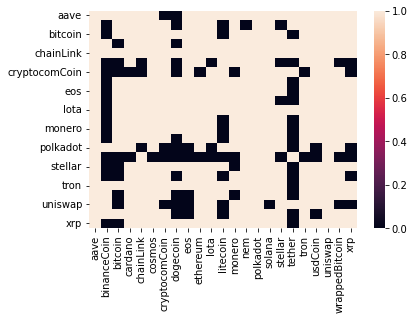

In [25]:
data = np.zeros([len(coinsDict)]*2, dtype=int)
from scipy import stats
for i, (key1, df) in enumerate(coinsDict.items()):
    for j, (key2, df2) in enumerate(coinsDict.items()):
        df1 = df.copy()
        
        start = max([min(df1["Date"]), min(df2["Date"])])
        end = min([max(df1["Date"]), max(df2["Date"])])
        df1 = df1[(df1["Date"] >= start) & (df1["Date"] <= end)]
        df2 = df2[(df2["Date"] >= start) & (df2["Date"] <= end)]
        df1.index = range(len(df1))
        df2.index = range(len(df2))
        df1["AbsDiff"] = np.abs(df1["DifferencePerc"])
        top100 = df1.nlargest(100, "AbsDiff")
        selector = np.zeros(len(df1))
        selector[top100.index] = 1
        high_mean = df2.iloc[selector]["DifferencePerc"].mean()
        means = []
        for k in range(1000):
            B = np.random.choice(df2.index,100,replace=True)
            mean = df2["DifferencePerc"].values[B].mean()
            means.append(mean)
        means = np.array(means)
        plt.figure()
        plt.hist(means)
        plt.vlines(high_mean, 0, len(means), label="Mean of Selected Days")
        plt.title(f"Histogram of {key2} on High Variation Days of {key1}")
        plt.xlabel("Mean of Differences")
        plt.ylabel("Frequency")
        plt.legend()
        plt.savefig(f"selected_plots/bootstrap/{key1}-{key2}.png", transparent=True)
        plt.close()
        l,u = means.mean() - 1.96*means.std(), means.mean()+ 1.96*means.std()
        data[i,j] = l <= high_mean <= u
h1 = pd.DataFrame((~data.astype(bool)).astype(int), columns=coinsDict.keys(), index=coinsDict.keys())
sb.heatmap(h1)

Os pares representados por pixels brancos indicam que a hipótese nula é verdadeira, enquanto os pixels pretos representam pares onde essa hipotese nula pode ser rejeitada, pois o valor da média selecionada não cai dentro do intervalo de confiança de $\mu$. É importante ressaltar que a relação não é reflexiva, ou seja, bitcoin afetar aave não nescessariamente implica que aave afeta bitcoin.

A seguir, temos alguns histogramas demonstrando a "raridade" dos valores da média encontrados. Como se pode ver, trivialmente, o valor da média para a própria moeda é muito raro nos dias de maior variação dela mesma. Temos também casos onde a média encontrada cai dentro do intervalo de confiânça, caso onde não podemos rejeitar a hipótese nula. Por fim, temos os casos onde a média observada é claramente anômala para o intervalo de confiânça do Bootstrap.


|                                             |                                             |
:--------------------------------------------:|:--------------------------------------------:
<img src="selected_plots/bootstrap/bitcoin-bitcoin.png"> |  <img src="selected_plots/bootstrap/tether-bitcoin.png">
<img src="selected_plots/bootstrap/lota-bitcoin.png"> |  <img src="selected_plots/bootstrap/polkadot-bitcoin.png">





<ipython-input-26-aac88d295881>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["AbsDiff"] = np.abs(df2["DifferencePerc"])


<AxesSubplot:>

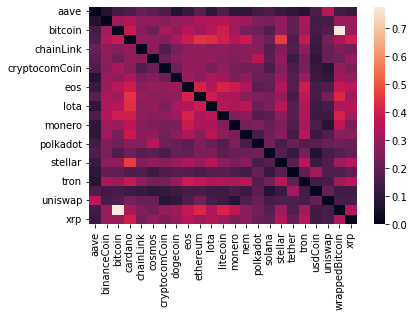

In [26]:
data = np.zeros([len(coinsDict)]*2)
from scipy import stats
for i, (key1, df) in enumerate(coinsDict.items()):
    for j, (key2, df2) in enumerate(coinsDict.items()):
        if i ==j:
            continue
        df1 = df.copy()
        
        start = max([min(df1["Date"]), min(df2["Date"])])
        end = min([max(df1["Date"]), max(df2["Date"])])
        df1 = df1[(df1["Date"] >= start) & (df1["Date"] <= end)]
        df2 = df2[(df2["Date"] >= start) & (df2["Date"] <= end)]
        df1.index = range(len(df1))
        df2.index = range(len(df2))
        df1["AbsDiff"] = np.abs(df1["DifferencePerc"])
        df2["AbsDiff"] = np.abs(df2["DifferencePerc"])
        top10_1 = df1.nlargest(len(df1)//5, "AbsDiff")
        top10_2 = df2.nlargest(len(df1)//5, "AbsDiff")
        top1 = set(top10_1["Date"])
        top2 = set(top10_2["Date"])
        data[i,j] = len(top1.intersection(top2))/len(top1.union(top2))
pvalues = pd.DataFrame(data, columns=coinsDict.keys(), index=coinsDict.keys())
sb.heatmap(pvalues)

Temos alguns pontos de alta similaridade, como por exemplo (stellar, cardanno) e (bitcoin, wrappedbitcoin), mas no geral as similaridades se apresentam baixas.

### Correlações entre as moedas
Nesta sessão iremos explorar, durante um periodo de tempo especifico, duas correlações:
1. Entre os valores de fechamento de todas com todas
2. Entre as variações de valor de todas com todas

Aqui o ano de 2019 foi o escolhido porque este é o com maior quantidade de dados para todas as moedas.

In [27]:
os.chdir(notebooks_dir)
os.chdir("../plots/Heatmaps")

In [28]:
dates = coinsDict["bitcoin"][coinsDict["bitcoin"]["Year"] == "2019"]["Date"]

In [29]:
closes = {name: coin[coin["Date"].isin(dates)]["Close"].to_numpy() for name, coin in coinsDict.items()}
closes = {name:coin for name,coin in closes.items() if len(coin) == 365}
closes = pd.DataFrame(closes)

In [30]:
closes

,binanceCoin,bitcoin,cardano,chainLink,cryptocomCoin,dogecoin,eos,ethereum,lota,litecoin,monero,nem,stellar,tether,tron,usdCoin,xrp
0,6.075273,3843.519967,0.042547,0.299371,0.021466,0.002392,2.663533,140.819413,0.369184,31.979930,48.367497,0.066118,0.115930,1.018335,0.019561,1.013301,0.364771
1,6.188613,3943.409337,0.045258,0.316489,0.021441,0.002407,2.887629,155.047677,0.394705,33.433682,52.252449,0.067139,0.119331,1.024012,0.020222,1.018173,0.375243
2,5.903535,3836.741319,0.042682,0.365974,0.021424,0.002360,2.681411,149.135003,0.379233,32.026699,49.815357,0.064862,0.113825,1.019473,0.020088,1.013577,0.360224
3,6.065138,3857.717619,0.043812,0.437175,0.021559,0.002315,2.721645,154.581942,0.377061,32.404168,50.630874,0.065011,0.115361,1.017200,0.021492,1.008160,0.356747
4,6.065543,3845.194460,0.044701,0.395948,0.018613,0.002319,2.699468,155.638589,0.369546,34.936866,49.931811,0.064621,0.114046,1.018489,0.022294,1.011010,0.355275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,13.362720,7290.088518,0.033100,1.886506,0.035576,0.002053,2.580784,127.214611,0.163111,41.178173,45.344426,0.032484,0.046086,1.005803,0.013300,1.008644,0.191102
361,13.705417,7317.990034,0.033632,1.874338,0.034017,0.002064,2.630518,128.322712,0.163544,42.842522,45.548682,0.032815,0.045151,1.000307,0.013515,1.002402,0.193222
362,14.150045,7422.652589,0.034284,1.902404,0.034875,0.002068,2.692497,134.757985,0.168519,43.670659,46.829259,0.032368,0.046216,1.004210,0.013743,1.005283,0.197051
363,13.947442,7292.995078,0.033594,1.838974,0.033930,0.002054,2.645544,132.633489,0.160764,42.747337,46.498085,0.031994,0.045954,1.006175,0.013400,1.009358,0.194474


In [31]:
slopes = {name: coin[coin["Date"].isin(dates)]["DifferencePerc"].to_numpy() for name, coin in coinsDict.items()}
slopes = {name:coin for name,coin in slopes.items() if len(coin) == 365}
slopes = pd.DataFrame(slopes)

In [32]:
slopes

,binanceCoin,bitcoin,cardano,chainLink,cryptocomCoin,dogecoin,eos,ethereum,lota,litecoin,monero,nem,stellar,tether,tron,usdCoin,xrp
0,-0.018761,0.025838,0.038126,0.034246,0.054643,0.019479,0.038155,0.055474,0.034901,0.049955,0.046282,0.030121,0.026552,0.003004,0.035430,-0.005540,0.034775
1,0.015948,0.024471,0.063200,0.052264,-0.003988,0.007706,0.081212,0.095592,0.065397,0.044110,0.078721,0.012187,0.028237,0.006371,0.032028,0.003855,0.026164
2,-0.043483,-0.023990,-0.053739,0.156208,-0.001115,-0.018394,-0.068082,-0.039054,-0.039786,-0.039782,-0.048095,-0.033526,-0.043059,-0.001157,-0.003664,-0.000868,-0.038134
3,0.028852,0.006701,0.027756,0.185614,0.009368,-0.020728,0.013517,0.038070,-0.005702,0.012108,0.015609,0.002752,0.013915,-0.006211,0.072740,-0.006981,-0.008354
4,0.001632,-0.001760,0.023880,-0.099516,-0.134100,-0.000353,-0.008467,0.008431,-0.017758,0.080114,-0.012301,-0.005219,-0.009395,0.002918,0.041724,0.004248,-0.003007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.011665,0.007177,-0.034413,0.013886,0.001063,-0.003023,0.021490,0.006693,0.027222,0.022762,0.001047,0.019316,0.022035,0.001814,-0.008304,0.003288,0.003671
361,0.026361,0.003973,0.016245,-0.006279,-0.043511,0.005459,0.019417,0.008723,0.003651,0.040747,0.004841,0.010077,-0.018770,-0.005371,0.016361,-0.006189,0.011302
362,0.033089,0.014350,0.019241,0.015000,0.025410,0.002513,0.024274,0.050606,0.029358,0.020396,0.028850,-0.012193,0.023869,-0.001849,0.017755,0.002750,0.020376
363,-0.014672,-0.017153,-0.019935,-0.033479,-0.024746,-0.007344,-0.017311,-0.016047,-0.046364,-0.023006,-0.007329,-0.012079,-0.005381,0.002116,-0.025004,0.003192,-0.013138


Separamos para essa análise os valores finais das moedas para cada dia, e suas variações percentuais

In [33]:
def corr_heatmaps(data1, data1_name, data2, data2_name):

    # Basic Configuration
    fig, axes = plt.subplots(ncols=2, figsize=(12, 12))
    ax1, ax2 = axes
    corr_matrix1 = data1.corr()
    corr_matrix2 = data2.corr()
    columns1 = corr_matrix1.columns
    columns2 = corr_matrix2.columns

    # Heat maps
    im1 = ax1.matshow(corr_matrix1, cmap='coolwarm', vmin=-1, vmax=1)
    im2 = ax2.matshow(corr_matrix2, cmap='coolwarm', vmin=-1, vmax=1)

    # Formatting for heat map 1.
    ax1.set_xticks(range(len(columns1)))
    ax1.set_yticks(range(len(columns1)))
    ax1.set_xticklabels(columns1)
    ax1.set_yticklabels(columns1)
    ax1.set_title(data1_name, y=-0.1)
    plt.setp(ax1.get_xticklabels(), rotation=90, ha='left', rotation_mode='anchor')
    plt.colorbar(im1, fraction=0.045, pad=0.05, ax=ax1)

    # Formatting for heat map 2.
    ax2.set_xticks(range(len(columns2)))
    ax2.set_yticks(range(len(columns2)))
    ax2.set_xticklabels(columns2)
    ax2.set_yticklabels(columns2)
    ax2.set_title(data2_name, y=-0.1)
    plt.setp(ax2.get_xticklabels(), rotation=90, ha='left', rotation_mode='anchor')
    plt.colorbar(im2, fraction=0.045, pad=0.05, ax=ax2)

    fig.tight_layout()
    
    plt.savefig("correlations_heatmaps.png".format(name), transparent=True, bbox_inches='tight')

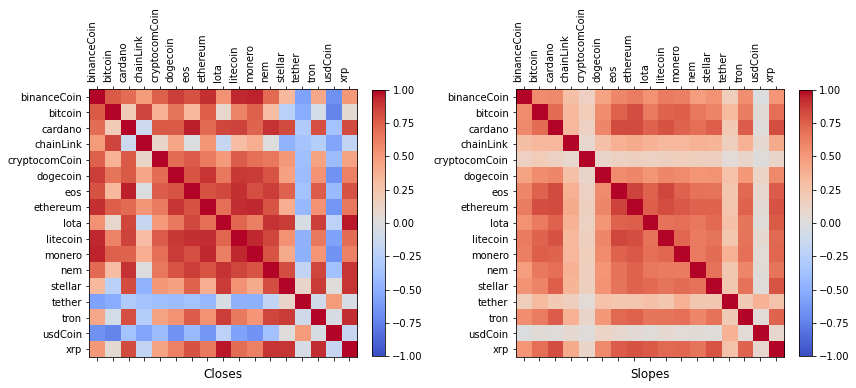

In [34]:
corr_heatmaps(closes, "Closes", slopes, "Slopes")

No heatmap de Closes, podemos notar correlações mais acentuadas que no de slopes. Além disso, interessante notar que as correlações de Slopes são majoritariamente positivas, enquanto tether, usdCoin, stellar, cardano e chainlink apresentam correlações negativas em Closes.

### Previsão do comportamento e valor de uma moeda baseada nas demais

A seguir, tentamos utilizar regressões para prever características das moedas.

Primeiro tentamos utilizar os valores de fechamento de todas as outras moedas para prever a moeda. Para isso, separamos do dataframe o valor da moeda no dia como resposta, e o de todas as outras como preditor. Em seguida, treinamos uma Regressão Linear por Quadrados Minimos. Realizamos validação cruzada 5-fold para determinar se há underfitting ou overfitting.

In [35]:
columns = list(closes.columns)
data = []
for coin in columns:
    cols = columns.copy()
    cols.remove(coin)
    df = closes[cols].copy()
    y = closes[coin]
    df["const"] = 1
    kfold = KFold(5)
    err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LinearRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y.values[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += np.mean((y_hat-y.values[test_idx])**2)
    
    est = sm.OLS(closes[coin], df)
    est = est.fit()
    data += [(coin, est.rsquared, est.mse_total, err, y.mean())]

In [36]:
closes_df = pd.DataFrame(data, columns=["coin", "R²", "MSE", "CV MSE", "Mean(y)"])
closes_df.set_index("coin")

,R²,MSE,CV MSE,Mean(y)
coin,,,,
binanceCoin,0.969274,6.927977e+01,6.436148e+01,20.092979
bitcoin,0.979702,6.962395e+06,2.978597e+06,7395.246281
cardano,0.972919,3.421702e-04,4.570640e-04,0.055499
chainLink,0.938322,8.836554e-01,2.064217e+00,1.536396
cryptocomCoin,0.808844,4.622954e-04,4.134697e-03,0.044579
dogecoin,0.914836,1.989740e-07,4.433300e-07,0.002563
eos,0.970325,1.974309e+00,1.395157e+00,4.020991
ethereum,0.983129,2.538413e+03,9.435550e+02,181.770138
lota,0.968561,4.921056e-03,3.242439e-03,0.297822


Temos um resultado muito positivo, exceto para o caso do par usdCoin/tether, que tem um comportamento anômalo. Nota-se que o MSE tem uma escala proxima da média de y. Também pode ser observado um underfitting da regressão linear, onde o erro de treino é maior que o erro de validação cruzada.

Porem, pode ser mais interessante/lucrativo prever a variação de uma moeda dadas as outras moedas. Isso é testado a seguir, utilizando o mesmo método, apenas mudando para o conjunto Slopes

In [37]:
columns = list(slopes.columns)
data = []
for col in columns:
    cols = columns.copy()
    cols.remove(col)
    df = slopes[cols].copy()
    df["const"] = 1
    y = slopes[col]
    kfold = KFold(5)
    err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LinearRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y.values[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += np.mean((y_hat-y.values[test_idx])**2)
    err /=5
    
    est = sm.OLS(slopes[col], df)
    est = est.fit()
    data += [(col, est.rsquared, est.mse_total, err, slopes[col].mean())]

In [38]:
slopes_df = pd.DataFrame(data, columns=["coin", "R²", "MSE", "CV MSE", "Mean(y)"])
slopes_df.set_index("coin")

,R²,MSE,CV MSE,Mean(y)
coin,,,,
binanceCoin,0.486190,0.001866,0.001103,3.034186e-03
bitcoin,0.732716,0.001267,0.000487,2.496347e-03
cardano,0.817326,0.002147,0.000484,4.869194e-04
chainLink,0.212575,0.004823,0.004373,7.109479e-03
cryptocomCoin,0.050625,0.010140,0.010550,4.973110e-03
dogecoin,0.434823,0.001184,0.000845,1.708370e-04
eos,0.820140,0.002516,0.000564,1.260728e-03
ethereum,0.863585,0.001695,0.000344,8.105688e-04
lota,0.688867,0.001624,0.000626,-1.326305e-03


O resultado não é tão positivo quanto o anterior, mas algumas moedas ainda apresentam R² relativamente alto e MSE baixo. Também é notável que existe menos underfitting emm algumas moedas.

Porém, pode fazer mais sentido tentar prever se a moeda vai ter crescimento ou decrescimento de valor naquele dia, independente do valor do crescimento. Isso é explorado a seguir. Construimos então um valor de resposta 1 se houve crescimento e 0 caso contrário, e utilizamos umas regressão logisitica

In [39]:

columns = list(slopes.columns)
data = []
for col in columns:
    cols = columns.copy()
    cols.remove(col)
    df = slopes[cols].copy()
    df["const"] = 1
    y = slopes[col].values
    y = (y> 0).astype(int)
    kfold = KFold(5)
    err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LogisticRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += roc_auc_score(y[test_idx], y_hat)
    err /= 5
    
    est = sm.OLS(slopes[col], df)
    est = est.fit()
    data += [(col, est.rsquared, err)]
pd.DataFrame(data, columns=["coin", "R²", "CV ROCAUC"])

,coin,R²,CV ROCAUC
0,binanceCoin,0.486190,0.706686
1,bitcoin,0.732716,0.771777
2,cardano,0.817326,0.823928
3,chainLink,0.212575,0.666308
4,cryptocomCoin,0.050625,0.535228
5,dogecoin,0.434823,0.732361
6,eos,0.820140,0.833991
7,ethereum,0.863585,0.845132
8,lota,0.688867,0.781772
9,litecoin,0.775508,0.807497


Para algumas moedas, como a stellar ou bitcoin, temos um preditor razoável de variação dada outras variações. Porém, talvez seja mais relevante prever o valor com antecedência, usando por exemplo os valores das moedas no dia anterior.

Usamos como baseline um preditor que retorna o sinal oposto ao da variação anterior

In [40]:
columns = list(slopes.columns)
data = []
for col in columns:
    cols = columns.copy()
    df = slopes[cols].copy()
    df["const"] = 1
    df = df.iloc[:-1]
    y = slopes[col].values[1:]
    y = (y> 0).astype(int)
    kfold = KFold(5)
    err = 0.
    baseline_err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LogisticRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += roc_auc_score(y[test_idx], y_hat)
        
        baseline_pred = ~(df[col].values[test_idx]> 0).astype(int)
        baseline_err += roc_auc_score(y[test_idx], baseline_pred)
    err /= 5
    baseline_err /= 5
    y = slopes[col].iloc[1:]
    y.index = df.index
    est = sm.OLS(y, df)
    est = est.fit()
    data += [(col, est.rsquared, err, baseline_err)]
pd.DataFrame(data, columns=["coin", "OLS R²", "LR CV ROCAUC", "Baseline"])

,coin,OLS R²,LR CV ROCAUC,Baseline
0,binanceCoin,0.048129,0.524209,0.541573
1,bitcoin,0.097392,0.506748,0.543014
2,cardano,0.089006,0.558644,0.553710
3,chainLink,0.087816,0.564960,0.553927
4,cryptocomCoin,0.035695,0.491304,0.541819
5,dogecoin,0.096015,0.504096,0.535240
6,eos,0.062837,0.579958,0.600482
7,ethereum,0.102819,0.514914,0.571984
8,lota,0.092825,0.525477,0.572226
9,litecoin,0.090153,0.503366,0.538253


Lamentavelmente uma regressão logistica utilizando $X_{t-1}$ tem resultado pouco melhor que o acaso para a maioria das CMs, e em muitos pior que o baseline. Porém é melhor que o baseline de repetir o sinal do ultimo valor.

Exploramos agora a possibilidade de prever a variação de uma moeda, dado um conjunto limitado de moedas. Escolhemos para isso, o conjunto para o qual pudemos rejeitar a hipótese nula na seção anterior.

In [41]:
columns = list(slopes.columns)
data = []
h = h1.loc[columns, columns]
for col in columns:
    cols = columns.copy()
    cols.remove(col)
    selected = slopes.columns[h.loc[:, col].astype(bool)]
    cols = [c for c in cols if c in selected]
    df = slopes[cols].copy()
    df["const"] = 1
    y = slopes[col]
    kfold = KFold(5)
    err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LinearRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y.values[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += np.mean((y_hat-y.values[test_idx])**2)
    err /=5
    
    est = sm.OLS(y, df)
    est = est.fit()
    data += [(est.rsquared, err, len(cols))]
data = pd.DataFrame(data, columns=["Selected R²", "Selected CV MSE", "Num predictors"])
pd.concat((slopes_df, data), axis=1)

,coin,R²,MSE,CV MSE,Mean(y),Selected R²,Selected CV MSE,Num predictors
0,binanceCoin,0.486190,0.001866,0.001103,3.034186e-03,0.363337,0.001285,4
1,bitcoin,0.732716,0.001267,0.000487,2.496347e-03,0.717604,0.000490,10
2,cardano,0.817326,0.002147,0.000484,4.869194e-04,0.817296,0.000473,15
3,chainLink,0.212575,0.004823,0.004373,7.109479e-03,0.211844,0.004377,15
4,cryptocomCoin,0.050625,0.010140,0.010550,4.973110e-03,0.050625,0.010550,16
5,dogecoin,0.434823,0.001184,0.000845,1.708370e-04,0.417252,0.000776,10
6,eos,0.820140,0.002516,0.000564,1.260728e-03,0.817893,0.000566,15
7,ethereum,0.863585,0.001695,0.000344,8.105688e-04,0.863521,0.000342,15
8,lota,0.688867,0.001624,0.000626,-1.326305e-03,0.688867,0.000626,16
9,litecoin,0.775508,0.002378,0.000632,2.005702e-03,0.761162,0.000641,11


Aparentemente, há queda significativa de R² para as moedas com poucos preditores, e em poucas há uma queda pequena de MSE de validação cruzada. Acreditamos que isso signifique que, embora exista correlação nos picos, isso não necessariamente significa que uma moeda é boa preditora da outra

# Abaixo dessa linha será deletado
# ---------------------------------------------------------------------------------------------------

In [42]:
subdf = coinsDict['bitcoin'][['Difference', 'Year', 'Month']].groupby(['Year', 'Month']).sum()

In [43]:
subdf
# plt.hist(subdf['Difference'])

Difference
Year Month              
2013 04         5.095993
     05        -9.280022
     06       -32.839806
     07         6.224312
     08        26.770012
...                  ...
2020 10      2965.791415
     11      5869.076567
     12      9380.478105
2021 01      3369.342107
     02     13147.526109

[95 rows x 1 columns]

In [44]:
import copy
#dados Z-normalizados por dia
Zcoindict = copy.deepcopy(coinsDict)

for coin in Zcoindict:
    Zcoindict[coin]['High'] = (Zcoindict[coin]['High'] - Zcoindict[coin]['High'].mean())/Zcoindict[coin]['High'].std()
    Zcoindict[coin]['Low'] = (Zcoindict[coin]['Low'] - Zcoindict[coin]['Low'].mean())/Zcoindict[coin]['Low'].std()
    Zcoindict[coin]['Open'] = (Zcoindict[coin]['Open'] - Zcoindict[coin]['Open'].mean())/Zcoindict[coin]['Open'].std()
    Zcoindict[coin]['Close'] = (Zcoindict[coin]['Close'] - Zcoindict[coin]['Close'].mean())/ Zcoindict[coin]['Close'].std()
    # Zcoindict[coin]['Variation'] = (Zcoindict[coin]['Variation'] - Zcoindict[coin]['Variation'].mean())/Zcoindict[coin]['Variation'].std()

Zcoindict['bitcoin'].tail()



,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Year,Month,Day,Difference,DifferencePerc
2857,2858,Bitcoin,BTC,2021-02-23,6.848241,6.088838,7.120228,6.304182,1.061025e+11,9.099259e+11,2021,02,23,-5380.502887,-0.099262
2858,2859,Bitcoin,BTC,2021-02-24,6.442780,6.377251,6.345758,6.430475,6.369552e+10,9.263931e+11,2021,02,24,870.245655,0.017820
2859,2860,Bitcoin,BTC,2021-02-25,6.534427,6.359306,6.471811,6.056074,5.450657e+10,8.777661e+11,2021,02,25,-2615.229406,-0.052611
2860,2861,Bitcoin,BTC,2021-02-26,6.036685,5.963486,6.107119,5.947962,3.509679e+11,8.637523e+11,2021,02,26,-840.703971,-0.017819
2861,2862,Bitcoin,BTC,2021-02-27,6.020338,6.085604,5.986591,5.926270,4.591095e+10,8.609781e+11,2021,02,27,-156.320962,-0.003373


In [45]:
#A data de criação da moeda diz algo a respeito do seu Marketcap atual ?

from datetime import datetime

df_allCoins = pd.DataFrame()

for coins in coinsDict:
  df_aux = convert(coinsDict[coins].iloc[[0, -1]], 'dataframe')
  df_allCoins = pd.concat([df_allCoins, df_aux], ignore_index=True)

df_coin_per_existence_time = pd.DataFrame(columns=['Name', 'Existence_time (days)', 'Last_Marketcap'])

for coinName in np.unique(df_allCoins["Name"]):
  init_time = df_allCoins[df_allCoins["Name"] == coinName]["Date"].iloc[0]
  init_time = datetime.fromisoformat(init_time)

  end_time = df_allCoins[df_allCoins["Name"] == coinName]["Date"].iloc[1]
  end_time = datetime.fromisoformat(end_time)

  existence_time = (pd.Timedelta(end_time - init_time).days)

  last_mktcap = df_allCoins[df_allCoins["Name"] == coinName]["Marketcap"].iloc[1]

  series_aux = pd.Series([coinName, existence_time, last_mktcap], index=df_coin_per_existence_time.columns)
  df_coin_per_existence_time = pd.concat([df_coin_per_existence_time, convert(series_aux, 'dataframe')], ignore_index=True)

df_coin_per_existence_time = df_coin_per_existence_time.sort_values(by=['Existence_time (days)', 'Last_Marketcap']).reset_index()
df_coin_per_existence_time


NameError: name 'convert' is not defined

In [ ]:
df_coin_per_existence_time[["Existence_time (days)","Last_Marketcap"]].applymap(float).corr()

In [ ]:
x, y = df_coin_per_existence_time[["Existence_time (days)","Last_Marketcap"]].applymap(float).values.T
x = sm.add_constant(x)
res = sm.OLS(y, x).fit()
res.summary()

# REVER

In [ ]:
def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
        elif isinstance(data, pd.Series):
            converted = data.to_frame().T
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
    else:
        return converted


$X_i = X_{i-1} + \delta_i$; $\delta_i = \delta_{i-1} + \Delta_i$

In [ ]:
coinsDict['bitcoin']['Difference'].var()

In [ ]:
#variancia da variação

coinsDict['bitcoin']['Difference'].std()

In [ ]:
coinsDict['bitcoin'].head()